In [1]:
# -*- coding: utf-8 -*-
%matplotlib nbagg
import logging
from sklearn.manifold import TSNE as tsne
import matplotlib.pyplot as plt
import Word2Vec
from gensim.models import word2vec
import pandas as pd
# import parser

/usr/local/lib/python2.7/dist-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',
                        level=logging.INFO)

In [3]:
train_data = Word2Vec.read_train_data('../data')

get data from folder ../data/positive/
get data from folder ../data/negative/


In [4]:
test_data = Word2Vec.read_test_data('../data')


get test data from folder ../data/positive/
get test data from folder ../data/negative/


In [5]:
model_name = '300size_20min_count.model'
Word2Vec.train_and_save_model(model_name, train_data, min_count=30)
model = word2vec.Word2Vec.load(model_name)

2016-12-19 22:57:51,019 : INFO : collecting all words and their counts
2016-12-19 22:57:51,020 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2016-12-19 22:57:51,072 : INFO : PROGRESS: at sentence #10000, processed 180020 words, keeping 8356 word types
2016-12-19 22:57:51,127 : INFO : PROGRESS: at sentence #20000, processed 366478 words, keeping 12099 word types
2016-12-19 22:57:51,175 : INFO : PROGRESS: at sentence #30000, processed 525313 words, keeping 16046 word types
2016-12-19 22:57:51,198 : INFO : collected 17606 word types from a corpus of 596876 raw words and 34459 sentences
2016-12-19 22:57:51,199 : INFO : Loading a fresh vocabulary
2016-12-19 22:57:51,217 : INFO : min_count=30 retains 1873 unique words (10% of original 17606, drops 15733)
2016-12-19 22:57:51,218 : INFO : min_count=30 leaves 530966 word corpus (88% of original 596876, drops 65910)
2016-12-19 22:57:51,230 : INFO : deleting the raw counts dictionary of 17606 items
2016-12-19 22:57:51

In [6]:
import os
from parser import pdf_to_text, text_to_sentences, sentence_to_wordlist
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from gensim.models import word2vec


In [7]:
clean_train = []
for text in train_data['text']:
    clean_train.append(sentence_to_wordlist(unicode(text, 'utf-8')))
trainDataVecs = Word2Vec.getAvgFeatureVecs(clean_train, model, 300)

clean_test = []
for text in test_data['text']:
    clean_test.append(sentence_to_wordlist(unicode(text, 'utf-8')))
testDataVecs = Word2Vec.getAvgFeatureVecs(clean_test, model, 300)


In [8]:
forest = RandomForestClassifier(n_estimators=100)

print "Fitting a random forest to labeled training data..."
forest = forest.fit(trainDataVecs, train_data['classification'])


Fitting a random forest to labeled training data...


In [9]:
print forest.score(testDataVecs, test_data['classification'])

0.96


In [10]:
importance = forest.feature_importances_
most_import_idx = np.argsort(-importance)[:3]

In [11]:
most_import_train_vec = trainDataVecs[:, most_import_idx]
forest_most_import = RandomForestClassifier(n_estimators=100)
forest_most_import = forest_most_import.fit(most_import_train_vec, train_data['classification'])

In [12]:
most_import_idx

array([219, 170, 229])

In [13]:
most_import_test_vec = testDataVecs[:, most_import_idx]
print forest_most_import.score(most_import_test_vec, test_data['classification'])

0.9


In [14]:
idx_import_sort = np.lexsort((model.syn0[:, most_import_idx[2]], model.syn0[:, most_import_idx[1]]
                              , model.syn0[:, most_import_idx[0]]))

In [28]:
most_occuring_idx = idx_import_sort[:10]
most_occuring_word = []
for i in most_occuring_idx:
     most_occuring_word.append(model.index2word[i])

In [29]:
positive_data = train_data.loc[train_data["classification"] == 1]

negative_data = train_data.loc[train_data["classification"] == 0]

In [30]:
from collections import Counter
positive_text = []
for text in positive_data['text']:
    positive_text.extend(sentence_to_wordlist(unicode(text, 'utf-8')))
positive_word_count = Counter(positive_text)

negative_text = []
for text in negative_data['text']:
    negative_text.extend(sentence_to_wordlist(unicode(text, 'utf-8')))
negative_word_count = Counter(negative_text)


In [38]:
def test():
    import parser
    import Word2Vec
    train_data = Word2Vec.read_train_data('../data')
    test_data = Word2Vec.read_test_data('../data')
    model_name = '300size_20min_count_without_last.model'
    Word2Vec.train_and_save_model(model_name, train_data, min_count=30)
    model = word2vec.Word2Vec.load(model_name)

    clean_train = []
    for text in train_data['text']:
        clean_train.append(sentence_to_wordlist(unicode(text, 'utf-8')))
    trainDataVecs = Word2Vec.getAvgFeatureVecs(clean_train, model, 300)

    clean_test = []
    for text in test_data['text']:
        clean_test.append(sentence_to_wordlist(unicode(text, 'utf-8')))
    testDataVecs = Word2Vec.getAvgFeatureVecs(clean_test, model, 300)

    forest = RandomForestClassifier(n_estimators=100)

    print "Fitting a random forest to labeled training data..."
    forest = forest.fit(trainDataVecs, train_data['classification'])

    importance = forest.feature_importances_
    most_import_idx = np.argsort(-importance)[:3]

    most_import_train_vec = trainDataVecs[:, most_import_idx]
    forest_most_import = RandomForestClassifier(n_estimators=100)
    forest_most_import = forest_most_import.fit(most_import_train_vec, train_data['classification'])

    idx_import_sort = np.lexsort((model.syn0[:, most_import_idx[2]], model.syn0[:, most_import_idx[1]]
                                  , model.syn0[:, most_import_idx[0]]))

    most_occuring_idx = idx_import_sort[:10]
    most_occuring_word = []
    for i in most_occuring_idx:
         most_occuring_word.append(model.index2word[i])


    positive_data = train_data.loc[train_data["classification"] == 1]

    negative_data = train_data.loc[train_data["classification"] == 0]

    from collections import Counter
    positive_text = []
    for text in positive_data['text']:
        positive_text.extend(sentence_to_wordlist(unicode(text, 'utf-8')))
    positive_word_count = Counter(positive_text)

    negative_text = []
    for text in negative_data['text']:
        negative_text.extend(sentence_to_wordlist(unicode(text, 'utf-8')))
    negative_word_count = Counter(negative_text)

    print "word \t\t positive_occurence \t\t negative_occurence"
    print '=' * 70
    for word in most_occuring_word:
        print ('%-25s %-30s %s' %  (word, str(positive_word_count[word]), str(negative_word_count[word])))

In [42]:
test()
print "all document"

get data from folder ../data/positive/
get data from folder ../data/negative/
get test data from folder ../data/positive/
get test data from folder ../data/negative/


2016-12-20 00:45:50,384 : INFO : collecting all words and their counts
2016-12-20 00:45:50,385 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2016-12-20 00:45:50,456 : INFO : PROGRESS: at sentence #10000, processed 180020 words, keeping 8356 word types
2016-12-20 00:45:50,504 : INFO : PROGRESS: at sentence #20000, processed 366478 words, keeping 12099 word types
2016-12-20 00:45:50,555 : INFO : PROGRESS: at sentence #30000, processed 525313 words, keeping 16046 word types
2016-12-20 00:45:50,580 : INFO : collected 17606 word types from a corpus of 596876 raw words and 34459 sentences
2016-12-20 00:45:50,581 : INFO : Loading a fresh vocabulary
2016-12-20 00:45:50,600 : INFO : min_count=30 retains 1873 unique words (10% of original 17606, drops 15733)
2016-12-20 00:45:50,601 : INFO : min_count=30 leaves 530966 word corpus (88% of original 596876, drops 65910)
2016-12-20 00:45:50,610 : INFO : deleting the raw counts dictionary of 17606 items
2016-12-20 00:45:50

Fitting a random forest to labeled training data...
word 		 positive_occurence 		 negative_occurence
экспертизы                18                             58
ф                         23                             67
направлено                23                             10
письмо                    29                             38
заявление                 274                            115
сведений                  15                             61
исковое                   197                            92
поручение                 31                             11
заявления                 255                            64
указанием                 30                             24
all document


In [67]:
import parser
parser.sentence_to_wordlist("hello h")

[u'hello', u'h']

In [39]:
test()
print "without last page"


get data from folder ../data/positive/
get data from folder ../data/negative/
get test data from folder ../data/positive/
get test data from folder ../data/negative/


2016-12-20 00:26:51,202 : INFO : collecting all words and their counts
2016-12-20 00:26:51,203 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2016-12-20 00:26:51,247 : INFO : PROGRESS: at sentence #10000, processed 180020 words, keeping 8356 word types
2016-12-20 00:26:51,303 : INFO : PROGRESS: at sentence #20000, processed 366478 words, keeping 12099 word types
2016-12-20 00:26:51,356 : INFO : PROGRESS: at sentence #30000, processed 525313 words, keeping 16046 word types
2016-12-20 00:26:51,381 : INFO : collected 17606 word types from a corpus of 596876 raw words and 34459 sentences
2016-12-20 00:26:51,382 : INFO : Loading a fresh vocabulary
2016-12-20 00:26:51,400 : INFO : min_count=30 retains 1873 unique words (10% of original 17606, drops 15733)
2016-12-20 00:26:51,402 : INFO : min_count=30 leaves 530966 word corpus (88% of original 596876, drops 65910)
2016-12-20 00:26:51,408 : INFO : deleting the raw counts dictionary of 17606 items
2016-12-20 00:26:51

Fitting a random forest to labeled training data...
word 		 positive_occurence 		 negative_occurence
денежная                  128                            2
пеней                     219                            8
определенная              126                            8
доказывать                84                             1
уплатить                  279                            61
штрафом                   123                            2
признается                133                            39
причинение                51                             1
стороне                   73                             69
взыскание                 48                             4
without last page


In [41]:
test()
print "doc's half"

get data from folder ../data/positive/
get data from folder ../data/negative/
get test data from folder ../data/positive/
get test data from folder ../data/negative/


2016-12-20 00:36:56,186 : INFO : collecting all words and their counts
2016-12-20 00:36:56,187 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2016-12-20 00:36:56,240 : INFO : PROGRESS: at sentence #10000, processed 180020 words, keeping 8356 word types
2016-12-20 00:36:56,295 : INFO : PROGRESS: at sentence #20000, processed 366478 words, keeping 12099 word types
2016-12-20 00:36:56,343 : INFO : PROGRESS: at sentence #30000, processed 525313 words, keeping 16046 word types
2016-12-20 00:36:56,367 : INFO : collected 17606 word types from a corpus of 596876 raw words and 34459 sentences
2016-12-20 00:36:56,369 : INFO : Loading a fresh vocabulary
2016-12-20 00:36:56,388 : INFO : min_count=30 retains 1873 unique words (10% of original 17606, drops 15733)
2016-12-20 00:36:56,388 : INFO : min_count=30 leaves 530966 word corpus (88% of original 596876, drops 65910)
2016-12-20 00:36:56,397 : INFO : deleting the raw counts dictionary of 17606 items
2016-12-20 00:36:56

Fitting a random forest to labeled training data...
word 		 positive_occurence 		 negative_occurence
штрафа                    32                             12
пеней                     219                            8
штраф                     20                             10
обязуется                 522                            316
уплатить                  279                            61
поставленных              83                             38
покупатель                1002                           471
деятельность              180                            69
вещь                      39                             46
предпринимательскую       171                            67
doc's half


In [26]:
from sklearn.manifold import TSNE as tsne
# def print_word(model):
#     plt.rc('font', family='verdana')
#     tsne_model = tsne()
#     vec = tsne_model.fit_transform(model.syn0)
#     for i, txt in enumerate(model.index2word):
#         plt.annotate(txt, vec[i])

#     plt.show()

plt.rc('font', family='verdana')
tsne_model = tsne()
vec = tsne_model.fit_transform(model.syn0)

<IPython.core.display.Javascript object>


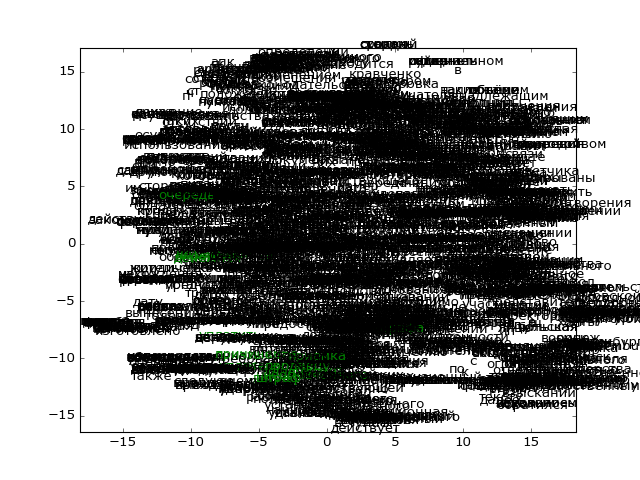

In [27]:
xmin = np.amin(vec[:, 0])
xmax = np.amax(vec[:, 0])
ymin = np.amin(vec[:, 1])
ymax = np.amax(vec[:, 1])

plt.axis([xmin, xmax, ymin, ymax])

for index in xrange(vec.shape[0]):
    if index in most_occuring_idx:
        plt.text(vec[index][0], vec[index][1], model.index2word[index], color='green')
    else:
        plt.text(vec[index][0], vec[index][1], model.index2word[index], color='black')
            
plt.show()